# Граф вычислений и дифференцирование на нем; Алгоритм обратного распространения

Метод градиентного спуска - метод нахождения минимального значения
функции ошибки.

Чтобы применить этот метод для решения задачи, мы должны вычислить
частные производные функции по всем переменным. Если мы сможем
представить сложную функцию как композицию простых, то мы легко сможем
вычислить частные производные.

Простая функция – любая функция, для которой можно легко вычислить её
саму и её производную по любому аргументу.

Удобнее всего представить композицию функций в виде графа вычислений, в
узлах которого простые функции, а ребра связывают функции с их
аргументами.



Рассмотрим на примере $f(x,y) = \ x^{2} + xy + \ {(x + y)}^{2}$.

Составим для этой функции граф вычислений, каждый узел графа обозначим
новой буквой:

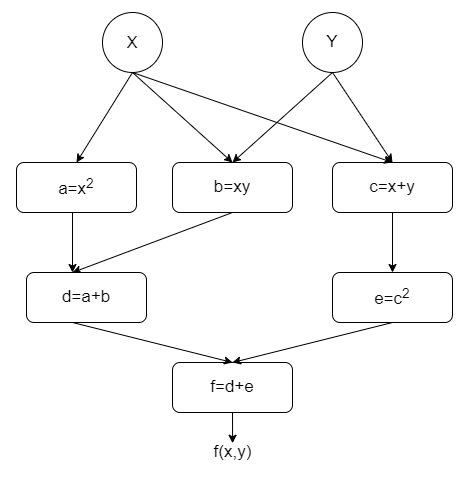

Мы сможем посчитать производные и градиенты любой сложной функции, если
сможем вычислить производные каждой компоненты. То есть – если мы знаем
граф вычислений и можем взять производную в каждом его узле, то можем
взять производную от всей сложной функции, которую задает граф.



Сначала посчитаем производную с «истоков» графа, пользуясь правилом взятия частных производных сложной функции:
$$
{\displaystyle {\frac {\partial h(x_{0})}{\partial x_{j}}}=\sum \limits _{i=1}^{n}{\frac {\partial g(y_{0})}{\partial y_{i}}}{\frac {\partial f(x_{0})}{\partial x_{j}}},\quad j=1,\ldots m.}
$$

Такой подход называется
*алгоритмом прямого распространения*.

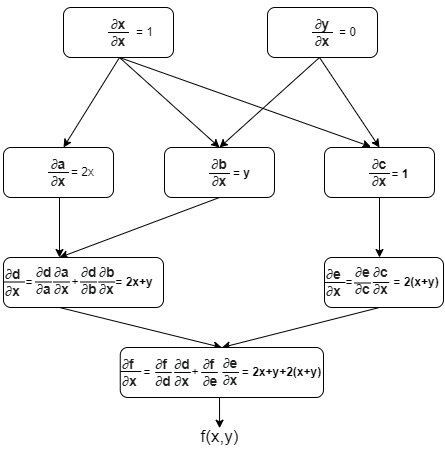

Но можно пойти в обратном направлении. В этом случае мы начнем с истока, где всегда стоит частная производная
равная 1, а затем в обратном порядке будем считать частные производные узлов.

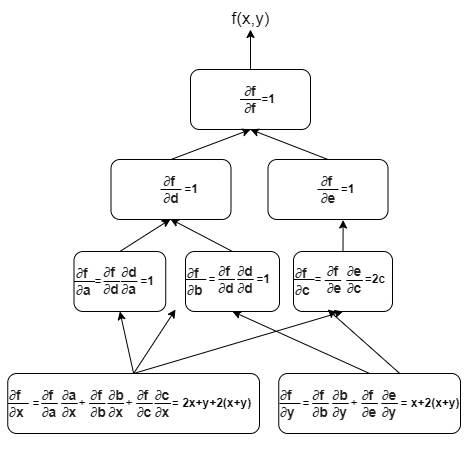

Для задач машинного обучения используют именно второй вариант, потому что при применении градиентных методов оптимизации (т.е. поиска минимума функции цели или loss-функции), необходимо посчитать значение градиента в точке, то есть найти частные производные функции по каждому из аргументов.


Пусть нам задан направленный граф вычислений $G(V,E)$, вершинами
которого являются функции $g \in V$, а ребра показывают
зависимость между функциями, находящимися в вершинах графа. Также, пусть
есть $n$ входных вершин и одна вершина, которая не имеет исходящий ребер –
она соответствует искомой функции $f$. Тогда, чтобы найти функцию $f$, нужно
двигаться по ребрам графа и вычислять каждую функцию, находящуюся в
узле.

Алгоритм для вычисления всех частных производных функции:

1.  Инициализируем $\frac{\partial f}{\partial f} = 1$;

2.  Для каждой вершины, у которой все вершины, соединенные с ней ребрами
    (Children), уже обработаны алгоритмом, вычисляем:

$$\frac{\partial f}{\partial g} = \ \sum_{g^{'}\in\text{Children}(g)}^{}{\frac{\partial f}{\partial g^{'}}\frac{\partial g^{'}}{\partial g}}.$$

Когда мы дойдем до истоков графа – входных вершин (соотвествуют аргументам функции), мы найдем все частные
производные функции $f$, то есть вычислим её градиент.

Такой подход называют *алгоритмом обратного распространения*
(backpropagation, backprop, bprop), потому что частные производные
считаются в направлении, обратном ребрам графа вычислений.